# Classification Based Machine Learning Algorithm

## Downloading the MNIST dataset

In [78]:
from scipy.io import loadmat
import os

import warnings
warnings.filterwarnings('ignore')

mnist_path = './data/mnist-original.mat'
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}
print("Done!")

Done!


In [79]:
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original'}

In [80]:
len(mnist['data'])

70000

# Visualisation

In [14]:
X, y = mnist['data'], mnist['target']

In [15]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
y

array([0., 0., 0., ..., 9., 9., 9.])

In [26]:
X[69999]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [27]:
y[69999]

9.0

In [28]:
X.shape

(70000, 784)

In [29]:
y.shape

(70000,)

In [44]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

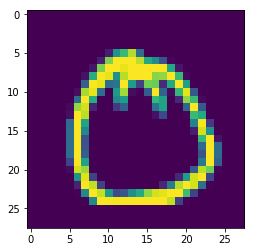

In [33]:
_ = X[1000]
_image = _.reshape(28, 28)
plt.imshow(_image)

In [34]:
y[1000]

0.0

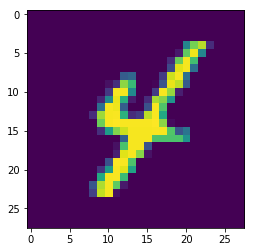

In [39]:
_ = X[30001]
_image = _.reshape(28, 28)
plt.imshow(_image)

In [40]:
y[30001]

4.0

In [41]:
type(y)

numpy.ndarray

In [42]:
y == 4

array([False, False, False, ..., False, False, False])

In [45]:
np.where(y==4)

(array([24754, 24755, 24756, ..., 65136, 65137, 65138], dtype=int64),)

***

# Splitting the train and test sets

In [46]:
num_split = 60000

X_train, X_test, y_train, y_test = X[:num_split], X[num_split:], y[:num_split], y[num_split:]

# Shuffling the dataset

In [49]:
shuffle_index = np.random.permutation(num_split)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Training a Binary Classifier

In [50]:
y_train_0 = (y_train == 0)

In [51]:
y_train_0

array([False, False, False, ..., False, False, False])

In [52]:
y_test_0 = (y_test == 0)

In [53]:
y_test_0

array([ True,  True,  True, ..., False, False, False])

***

# SGDClassifier

# Training

In [81]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state = 0)
clf.fit(X_train, y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=0, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

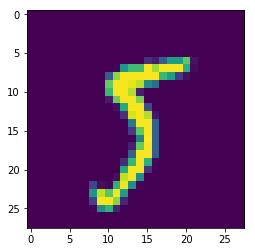

In [176]:
_ = X[32873]
_image = _.reshape(28, 28)
plt.imshow(_image)

# Prediction

In [179]:
clf.predict(X[1000].reshape(1, -1))

array([ True])

In [180]:
X[1000]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  21, 135, 172, 225,  91,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  22, 205, 254, 25

***

# Performance Measures

# Measuring Accuracy Using Cross-Validation

## StratifiedKFold

In [60]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

clf = SGDClassifier(random_state=0)

In [72]:
skfolds = StratifiedKFold(n_splits = 3, random_state = 100)

In [82]:
for train_index, test_index in skfolds.split(X_train, y_train_0):
    clone_clf = clone(clf)
    X_train_fold = X_train[train_index]
    y_train_fold = (y_train_0[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_0[test_index])
    
    clone_clf.fit(X_train_fold, y_train_fold)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct=sum(y_pred == y_test_fold)
    
    print("{0:.4f}".format(n_correct / len(y_pred)))

0.9854
0.9902
0.9872


### cross_val_score using K-fold Cross-Validation

In [74]:
from sklearn.model_selection import cross_val_score

In [83]:
cross_val_score(clf, X_train, y_train_0, cv=3, scoring='accuracy')

array([0.98540073, 0.9902    , 0.98719936])

***

***

# Danger of Blindly Applying Evaluator As A Performance Measure

In [84]:
1 - sum(y_train_0) / len(y_train_0)

0.9012833333333333

With this dataset, any guess that image is not 0 has 90.1% chance of being right

# Confusion Matrix

In [85]:
from sklearn.model_selection import cross_val_predict

In [86]:
y_train_pred = cross_val_predict(clf, X_train, y_train_0, cv = 3)

In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
confusion_matrix(y_train_0, y_train_pred)

array([[53874,   203],
       [  541,  5382]], dtype=int64)

# Precision

In [90]:
from sklearn.metrics import precision_score, recall_score

In [91]:
precision_score(y_train_0, y_train_pred) # 5328 / (203 + 5328)

0.9636526410026858

# Recall

In [92]:
recall_score(y_train_0, y_train_pred) # 5328 / (541 + 5382)

0.9086611514435252

# F1 Score

In [93]:
from sklearn.metrics import f1_score

In [94]:
f1_score(y_train_0, y_train_pred)

0.935349322210636

# Precision / Recall Tradeoff

Increasing precision reduced recall and vice versa 

In [95]:
clf = SGDClassifier(random_state = 0)
clf.fit(X_train, y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=0, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [96]:
y[1000]

0.0

In [97]:
y_scores = clf.decision_function(X[1000].reshape(1, -1))
y_scores

array([48234.81038986])

In [98]:
threshold = 0

In [99]:
y_some_digits_pred = (y_scores > threshold)

In [100]:
y_some_digits_pred

array([ True])

In [103]:
threshold = 40000
y_some_digits_pred = (y_scores > threshold)
y_some_digits_pred

array([ True])

In [104]:
y_scores = cross_val_predict(clf, X_train, y_train_0, cv = 3, method = 'decision_function')

(array([1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 5.000e+00, 9.000e+00,
        4.000e+00, 7.000e+00, 9.000e+00, 1.200e+01, 1.900e+01, 2.300e+01,
        2.800e+01, 4.100e+01, 4.200e+01, 4.900e+01, 5.100e+01, 7.000e+01,
        9.700e+01, 1.010e+02, 1.280e+02, 1.670e+02, 1.940e+02, 2.200e+02,
        2.730e+02, 3.190e+02, 3.700e+02, 4.190e+02, 5.460e+02, 6.190e+02,
        7.140e+02, 8.250e+02, 9.930e+02, 1.149e+03, 1.225e+03, 1.349e+03,
        1.470e+03, 1.690e+03, 1.817e+03, 1.877e+03, 2.042e+03, 2.187e+03,
        2.387e+03, 2.374e+03, 2.482e+03, 2.371e+03, 2.388e+03, 2.282e+03,
        2.247e+03, 2.106e+03, 2.041e+03, 1.913e+03, 1.686e+03, 1.534e+03,
        1.438e+03, 1.085e+03, 1.015e+03, 7.910e+02, 7.280e+02, 5.630e+02,
        4.350e+02, 3.610e+02, 2.960e+02, 2.700e+02, 2.250e+02, 1.970e+02,
        2.070e+02, 2.110e+02, 2.700e+02, 2.860e+02, 3.610e+02, 3.870e+02,
        4.050e+02, 4.300e+02, 4.470e+0

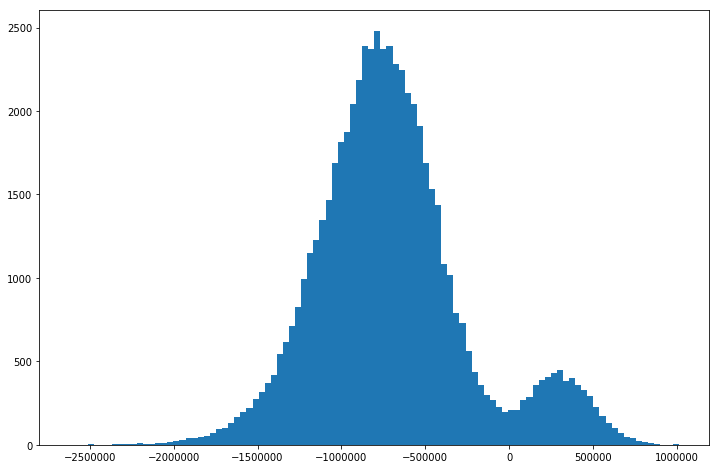

In [105]:
plt.figure(figsize=(12,8))
plt.hist(y_scores, bins=100)

In [106]:
from sklearn.metrics import precision_recall_curve

In [107]:
precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)

In [114]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.grid('on')
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([-0.5, 1.5])

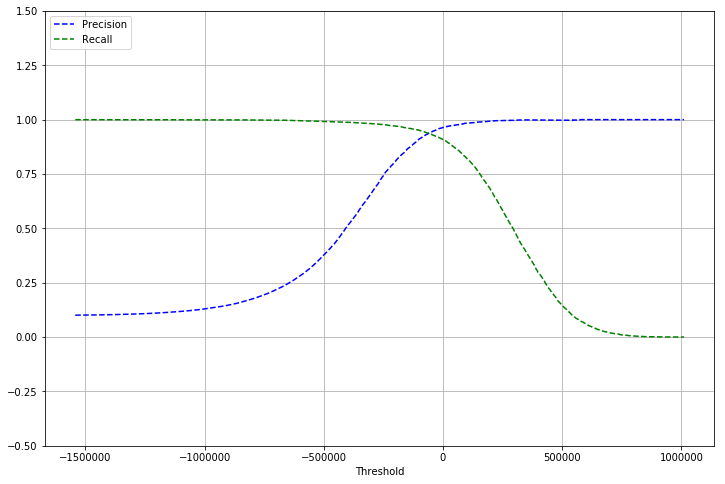

In [115]:
plt.figure(figsize=(12,8))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

Text(0.5, 1.0, 'PR Curve: precisions/recalls tradeoff')

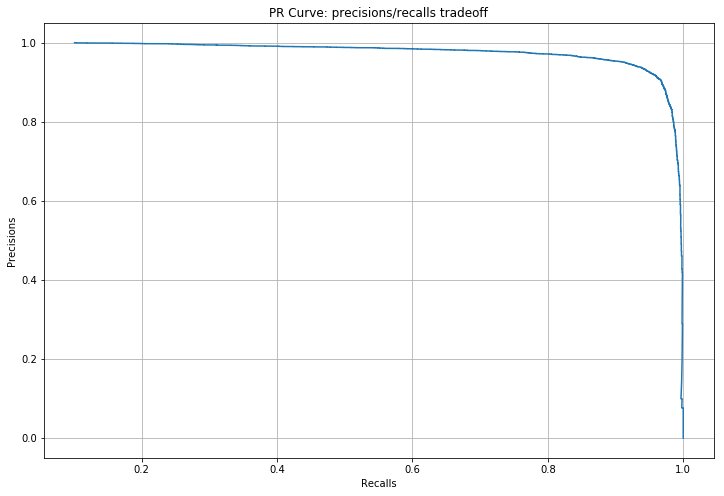

In [113]:
plt.figure(figsize=(12,8))
plt.plot(precisions, recalls)
plt.grid('on')
plt.xlabel("Recalls")
plt.ylabel("Precisions")
plt.title("PR Curve: precisions/recalls tradeoff")

# Setting High Precisions

In [116]:
len(precisions)

58794

In [117]:
len(thresholds)

58793

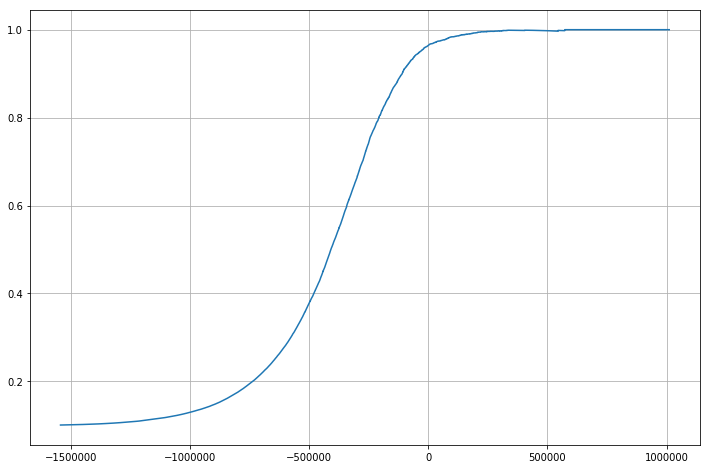

In [119]:
plt.figure(figsize=(12,8))
plt.grid('on')
plt.plot(thresholds, precisions[1:])

In [120]:
idx = len(precisions[precisions < 0.9])

In [121]:
thresholds[idx]

-109049.47668685159

In [122]:
y_train_pred_90 = (y_scores > -109049)

In [123]:
precision_score(y_train_0, y_train_pred_90)

0.9001913265306123

In [124]:
recall_score(y_train_0, y_train_pred_90)

0.9532331588721932

# Setting Really High Precision

In [125]:
idx = len(precisions[precisions < 0.99])
thresholds[idx]

166879.5577859531

In [132]:
y_train_pred_99 = (y_scores > thresholds[idx])

In [133]:
precision_score(y_train_0, y_train_pred_99)

0.9901534234027937

In [134]:
recall_score(y_train_0, y_train_pred_99)

0.7300354550059092

# Setting High Recall Score

In [143]:
idx = len(recalls[recalls > 0.9])
thresholds[idx]

13857.255873780021

In [144]:
y_train_recall_90 = (y_scores > thresholds[idx])

In [145]:
precision_score(y_train_0, y_train_recall_90)

0.9680290644868301

In [146]:
recall_score(y_train_0, y_train_recall_90)

0.8997129832854972

# The Receiver Operating Characteristics (ROC) Curve

In [147]:
from sklearn.metrics import roc_curve

In [148]:
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

In [156]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.grid('on')
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

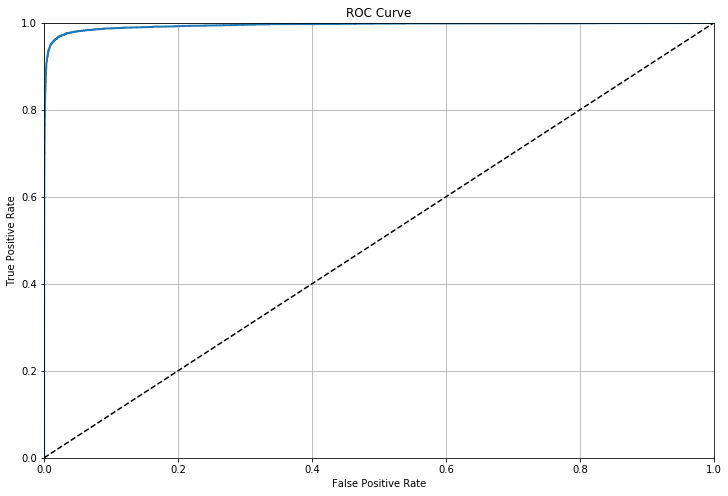

In [157]:
plt.figure(figsize=(12,8))
plot_roc_curve(fpr, tpr)

In [158]:
from sklearn.metrics import roc_auc_score

In [159]:
roc_auc_score(y_train_0, y_scores)

0.9944070034689657

Use PR Curve whenever the **positive class is rare** or when you care more about the false positives than the false negatives  
Use ROC Curve whenever the **negative class is rare** or when you care more about the false negatives than the false positives

# Model Comparison

## Random Forest

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
f_clf = RandomForestClassifier(random_state=0)

In [163]:
y_probas_forest = cross_val_predict(f_clf, X_train, y_train_0, cv=3, method='predict_proba')

In [164]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_0, y_scores_forest)

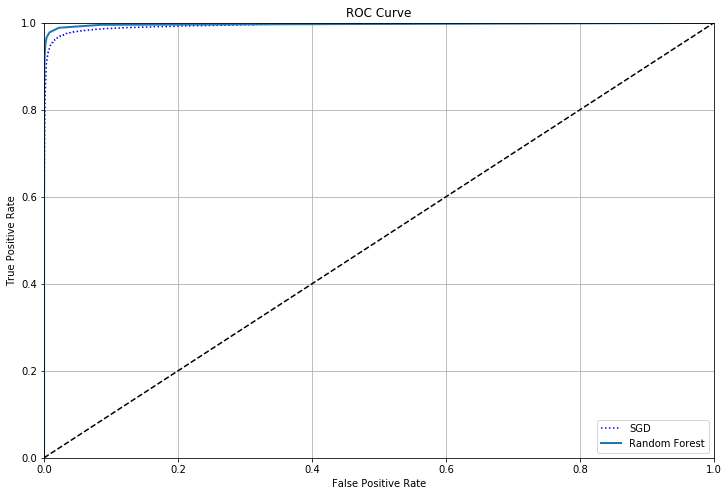

In [165]:
plt.figure(figsize=(12,8))
plt.grid('on')
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")

In [166]:
roc_auc_score(y_train_0, y_scores_forest)

0.9968914892403458

In [167]:
f_clf.fit(X_train, y_train_0)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [168]:
y_train_rf = cross_val_predict(f_clf, X_train, y_train_0, cv=3)

In [169]:
precision_score(y_train_0, y_train_rf)

0.9916772209155057

In [170]:
recall_score(y_train_0, y_train_rf)

0.9253756542292757

In [171]:
confusion_matrix(y_train_0, y_train_rf)

array([[54031,    46],
       [  442,  5481]], dtype=int64)

***